## Naive Bayes 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  auc, plot_roc_curve

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [28]:
from preprocessing import cargarDatasets
from preprocessing import prepararSetDeEntrenamiento
from preprocessing import ingenieriaDeFeaturesCategoricalNB, ingenieriaDeFeaturesGaussianNB

In [ ]:
from preprocessing import prepararHoldOut
from preprocessing import prepararSetDeHoldOutCategoricalNB
from preprocessing import prepararSetDeHoldOutGaussianNB

# Carga y preprocesamiento de datos

In [29]:
train_df,final_df = cargarDatasets()
train_df = prepararSetDeEntrenamiento(train_df)

Luego de tener cargado el set de datos, vamos a aplicarle determinados preprocesamientos. Par eso vamos a distingir este algoritmos en 3:
   *  categorical nb
   *  Multinomial nb
   * gaussian nb

# Categorical Naive Bayes 

Este metodo es utilizado para variables categoricas, nos fijamos cuales son categoricas y luego nos desascemos de las que son numericcas.

In [30]:
final_df.head()

,id,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,representatividad_poblacional,rol_familiar_registrado,trabajo
0,1,11,Palermo,relacion_de_dependencia,25,2_anio,sin_matrimonio,0,hombre,40,judaismo,226802,con_hijos,inspector
1,2,13,Palermo,relacion_de_dependencia,38,4_anio,matrimonio_civil,0,hombre,50,cristianismo,89814,casado,sector_primario
2,3,16,Palermo,empleado_municipal,28,universidad_2_anio,matrimonio_civil,0,hombre,40,cristianismo,336951,casado,seguridad
3,4,14,Palermo,relacion_de_dependencia,44,5_anio,matrimonio_civil,7688,hombre,40,judaismo,160323,casado,inspector
4,5,14,Palermo,NaN,18,5_anio,sin_matrimonio,0,mujer,30,cristianismo,103497,con_hijos,NaN


vemos que las que son categoricas son barrio, genero, estado_marital, religion, trabajo, rol familiar y educacion_alcanza. Dentro de estas no vamos a tener en cuenta ni el barrio ni la religion ya que cuando hicimos el analisis previo vimos que eran features irrelevantes con respecto a la variable target. Luego estado marital y rol familiar estaban muy relacionados por lo que nos quedamos con estado marital.

In [31]:
X,y,df,y_encoder = ingenieriaDeFeaturesCategoricalNB(train_df)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=117, test_size=0.1, stratify=y)

Ahora buscamos los mejores hiperparametros, en este caso solo tenemos alfa, en la cual nos indic que tan smothing se van a realizar las diferenctes convinaciones para evitar la probalidad cero. 

In [33]:
parametrosCategorica = [{'alpha': [0.0005,0.001,0.01,0.1,0.3,0.5,0.7,1,2,3,5, 10, 15, 20, 50]}]

In [28]:
categorical = CategoricalNB()
modelo1 = GridSearchCV(
    categorical, parametrosCategorica, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

In [29]:
print(f"Best score: {modelo1.best_score_}")
print(f"Best params {modelo1.best_params_}")

Best score: 0.841265615318051
Best params {'alpha': 0.1}


# Entrenamos 

In [34]:
categoricalNB = CategoricalNB(alpha=0.1)

categoricalNB.fit(X_train, y_train)


CategoricalNB(alpha=0.1)

# Metricas

In [32]:
y_pred = categoricalNB.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No tiene alto valor adquisitivo','Tiene alto valor adquisitivo']))

                                 precision    recall  f1-score   support

No tiene alto valor adquisitivo       0.86      0.87      0.87      2473
   Tiene alto valor adquisitivo       0.58      0.57      0.57       784

                       accuracy                           0.80      3257
                      macro avg       0.72      0.72      0.72      3257
                   weighted avg       0.80      0.80      0.80      3257



# Curva auc roc

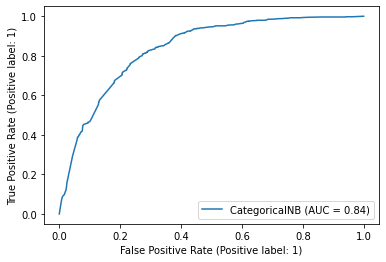

In [35]:
plot_roc_curve(categoricalNB,X_test,y_test,response_method='predict_proba')
plt.show()

# Matriz de Confucion 

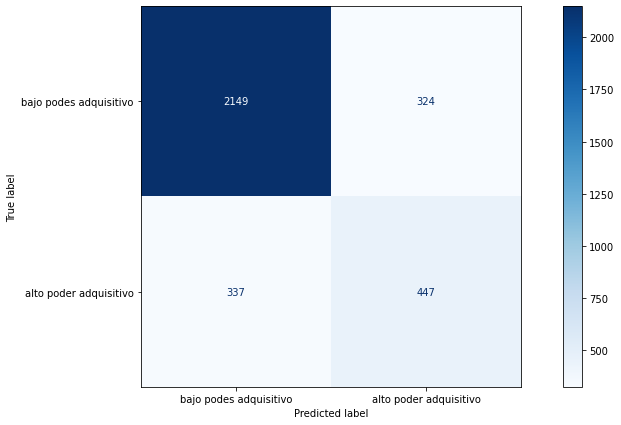

In [37]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    categoricalNB, X_test, y_test, cmap=plt.cm.Blues, display_labels=['bajo podes adquisitivo', 'alto poder adquisitivo'], ax=ax
)
plt.show()

# Prediccion sobre el data ser de HoldOut 

se predice para el algoritmo de naive bayes categorico 

In [36]:
final_df = prepararHoldOut(final_df)

In [38]:
final_df_categorical = prepararSetDeHoldOutCategoricalNB(final_df)

In [39]:
ho_prediction = categoricalNB.predict(final_df_categorical)
final_df['tiene_alto_valor_adquisitivo'] = ho_prediction

final_df.to_csv('predicciones/categoricalNB.csv')

## GaussianNB

este modelo es utilizado para variables continuas, En este caso vamos a considerar la edad, anios estudiados y inversion en la bolsa. Como no hay muchos feautures no esperamos que tengamos un muy buen resultado.


In [55]:
train_df2,final_df2 = cargarDatasets()
train_df2 = prepararSetDeEntrenamiento(train_df2)

In [56]:
X,y,df,y_encoder = ingenieriaDeFeaturesGaussianNB(train_df2)

In [57]:
X.head()

,anios_estudiados,edad,ganancia_perdida_declarada_bolsa_argentina
0,17,39,2174
1,17,50,0
2,13,38,0
3,11,53,0
4,17,28,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=117, test_size=0.1, stratify=y)

Busco los mejores hiperparametros, en este caso corresponde al valor de smothing.

In [59]:
parametrosGaussian = [{'var_smoothing' : [0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1, 3]}]

In [16]:
gaussian = GaussianNB()
modelo1 = GridSearchCV(
    gaussian, parametrosGaussian, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

In [17]:
print(f"Best score: {modelo1.best_score_}")
print(f"Best params {modelo1.best_params_}")

Best score: 0.8237172447758583
Best params {'var_smoothing': 1e-08}


# Entrenamos 

In [60]:
gaussianNB = GaussianNB(var_smoothing = 0.00000001)
gaussianNB.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-08)

# Metricas 

In [125]:
y_pred = gaussianNB.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No tiene alto valor adquisitivo','Tiene alto valor adquisitivo']))

                                 precision    recall  f1-score   support

No tiene alto valor adquisitivo       0.80      0.98      0.88      2473
   Tiene alto valor adquisitivo       0.77      0.21      0.33       784

                       accuracy                           0.79      3257
                      macro avg       0.78      0.60      0.60      3257
                   weighted avg       0.79      0.79      0.75      3257



podemos observar que el recall para si tiene alto poder aquisitivo es muy bajo. 

# Curva Auc Roc

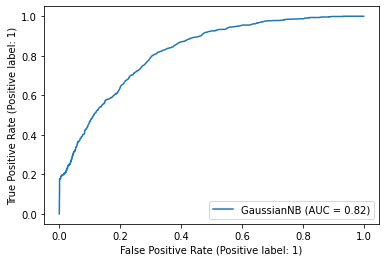

In [126]:
plot_roc_curve(gaussianNB,X_test,y_test,response_method='predict_proba')
plt.show()

# Matriz de confucion

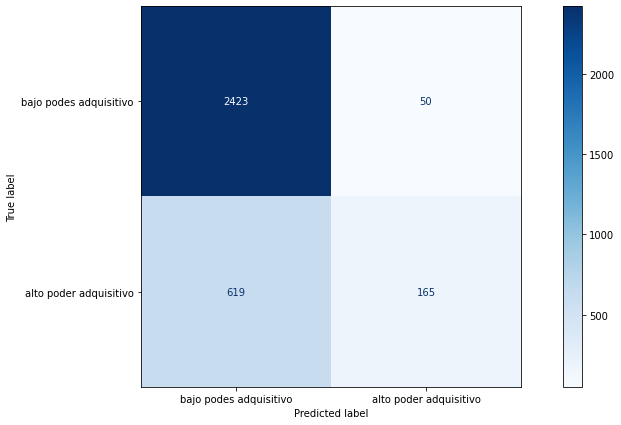

In [127]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    gaussianNB, X_test, y_test, cmap=plt.cm.Blues, display_labels=['bajo podes adquisitivo', 'alto poder adquisitivo'], ax=ax
)
plt.show()

# Prediccion sobre el data set de hold out

In [61]:
final_df2 = prepararHoldOut(final_df2)

In [62]:
final_df_gaussian = prepararSetDeHoldOutGaussianNB(final_df2)

In [63]:
ho_prediction2 = gaussianNB.predict(final_df_gaussian)
final_df['tiene_alto_valor_adquisitivo'] = ho_prediction2

final_df.to_csv('predicciones/gaussianNB.csv')